## Sentiment Analysis on Patient's Drug Reviews using Dataset from Drugs.com

*Submitted for fulfilling the requirement of edX Final project by <b>Vinod Rowmuria</b>, Mumbai*

Dataset location: https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29

The dataset provides patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction.<br />The data has the following attributes:

1. **drugName** (categorical): name of drug
2. **condition** (categorical): name of condition
3. **review** (text): patient review
4. **rating** (numerical): 10 star patient rating
5. **date** (date): date of review entry
6. **usefulCount** (numerical): number of users who found review useful

#### Data Source Credits:
Surya Kallumadi, Kansas State University, Manhattan, Kansas, USA (surya '@' ksu.edu)<br />
Felix Gräßer, Institut für Biomedizinische Technik, Technische Universität Dresden, Dresden, Germany (felix.graesser '@' tu-dresden.de

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>Exploring the Datasets</p>

The downloaded Drug Reviews data from Drugs.com is already available as split into **train (75%)** and **test (25%)** partitions and stored in two .tsv (tab-separated-values) files - **drugsComTrain_raw.tsv** and **drugsComTest_raw.tsv**.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading data from the training set

drug_train = pd.read_table('./drugsCom_raw/drugsComTrain_raw.tsv')
drug_train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [3]:
# Reading data from the testing set

drug_test = pd.read_table('./drugsCom_raw/drugsComTest_raw.tsv')
drug_test.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [4]:
drug_train.shape, drug_test.shape

((161297, 7), (53766, 7))

The datasets are huge. The **training set has 1,61,297 rows** of reviews and the **testing set has 53,766** rows, with seven columns of attributes.

In [5]:
# Checking the data types

drug_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
Unnamed: 0     161297 non-null int64
drugName       161297 non-null object
condition      160398 non-null object
review         161297 non-null object
rating         161297 non-null float64
date           161297 non-null object
usefulCount    161297 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 8.6+ MB


In [6]:
# Checking if the datasets have null values

drug_train.isnull().any()

Unnamed: 0     False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [7]:
drug_train.isnull().sum()

Unnamed: 0       0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [8]:
drug_test.isnull().any()

Unnamed: 0     False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

In [9]:
drug_test.isnull().sum()

Unnamed: 0       0
drugName         0
condition      295
review           0
rating           0
date             0
usefulCount      0
dtype: int64

Both the datasets have null values in the condition column. The **training set has 899 rows** with null condition and the **testing set has 295 rows**, which are very small in numbers in comparision to the rows in the respective parent datasets. Removing these rows will not have much impact on the original datasets.

In [10]:
# Checking sample null rows in the training set before removing

drug_train[drug_train.isnull().any(axis=1)].head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
30,51452,Azithromycin,NaN,"""Very good response. It is so useful for me. """,10.0,"August 18, 2010",1
148,61073,Urea,NaN,"""Accurate information.""",10.0,"July 2, 2011",13
488,132651,Doxepin,NaN,"""So far so good. Good for me and I can take it...",10.0,"October 20, 2010",25
733,44297,Ethinyl estradiol / norgestimate,NaN,"""I haven&#039;t been on it for a long time and...",8.0,"January 24, 2011",1
851,68697,Medroxyprogesterone,NaN,"""I started the shot in July 2015 and ended in ...",6.0,"March 23, 2017",1


In [11]:
# Checking sample null rows in the testing set before removing

drug_test[drug_test.isnull().any(axis=1)].head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
34,77164,Lorcaserin,NaN,"""Have had back and leg pain and sometimes arm ...",5.0,"May 27, 2014",21
146,192374,Drospirenone / ethinyl estradiol,NaN,"""I hate this birth control. I was originally t...",4.0,"April 13, 2015",8
156,165767,Levonorgestrel,NaN,"""I&#039;ve never had kids and I am 32 fyi. The...",7.0,"April 3, 2017",0
779,157589,Guaifenesin,NaN,"""You&#039;ll almost always notice a medicinal ...",9.0,"February 23, 2010",10
1017,96918,Conjugated estrogens / medroxyprogesterone,NaN,"""Has not worked one bit still have day and nig...",1.0,"July 6, 2015",5


The reviews in the null condition rows will have no reference to any specific medical condition. So, we can delete these rows with the null values.

In [12]:
# Removing the rows with null values

drug_train = drug_train.dropna()
drug_test = drug_test.dropna()
drug_train.shape, drug_test.shape

((160398, 7), (53471, 7))

So, after removing the rows with null values the **training dataset has 1,60,398 rows** of reviews and the **testing dataset has 53,471 rows**.

Now, let's create a **full dataset** with both training and the testing datasets. We will be using the full dataset to process data or creating new columns in both training and the testing datasets in one go. But for actual training and testing purpose, we will be using the respective train and test datasets.

In [13]:
# Creating a full dataset, which is a list with both training and testing datasets

full_data = [drug_train, drug_test]
full_data

[        Unnamed: 0                            drugName  \
 0           206461                           Valsartan   
 1            95260                          Guanfacine   
 2            92703                              Lybrel   
 3           138000                          Ortho Evra   
 4            35696            Buprenorphine / naloxone   
 5           155963                              Cialis   
 6           165907                      Levonorgestrel   
 7           102654                        Aripiprazole   
 8            74811                              Keppra   
 9            48928  Ethinyl estradiol / levonorgestrel   
 10           29607                          Topiramate   
 11           75612                      L-methylfolate   
 12          191290                             Pentasa   
 13          221320                    Dextromethorphan   
 14           98494                           Nexplanon   
 15           81890                         Liraglutide 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>Exploring the Data Contents</p>

In [14]:
# Number of drugs present in the dataset?

drugs = drug_train['drugName'].unique().tolist()
len(drugs)

3431

In [15]:
drugs

['Valsartan',
 'Guanfacine',
 'Lybrel',
 'Ortho Evra',
 'Buprenorphine / naloxone',
 'Cialis',
 'Levonorgestrel',
 'Aripiprazole',
 'Keppra',
 'Ethinyl estradiol / levonorgestrel',
 'Topiramate',
 'L-methylfolate',
 'Pentasa',
 'Dextromethorphan',
 'Nexplanon',
 'Liraglutide',
 'Trimethoprim',
 'Amitriptyline',
 'Lamotrigine',
 'Nilotinib',
 'Atripla',
 'Trazodone',
 'Etonogestrel',
 'Etanercept',
 'Tioconazole',
 'Azithromycin',
 'Eflornithine',
 'Daytrana',
 'Ativan',
 'Imitrex',
 'Sertraline',
 'Toradol',
 'Viberzi',
 'Mobic',
 'Dulcolax',
 'Morphine',
 'MoviPrep',
 'Trilafon',
 'Fluconazole',
 'Contrave',
 'Clonazepam',
 'Metaxalone',
 'Venlafaxine',
 'Ledipasvir / sofosbuvir',
 'Symbyax',
 'Tamsulosin',
 'Doxycycline',
 'Dulaglutide',
 'Intuniv',
 'Buprenorphine',
 'Qvar',
 'Opdivo',
 'Pyridium',
 'Latuda',
 'Bupropion',
 'Implanon',
 'Effexor XR',
 'Drospirenone / ethinyl estradiol',
 'NuvaRing',
 'Prepopik',
 'Tretinoin',
 'Gildess Fe 1 / 20',
 'Ethinyl estradiol / norgestimate'

In [16]:
# Medical conditions covered in the dataset?

conditions = drug_train['condition'].unique().tolist()
len(conditions)

884

In [17]:
conditions

['Left Ventricular Dysfunction',
 'ADHD',
 'Birth Control',
 'Opiate Dependence',
 'Benign Prostatic Hyperplasia',
 'Emergency Contraception',
 'Bipolar Disorde',
 'Epilepsy',
 'Migraine Prevention',
 'Depression',
 "Crohn's Disease",
 'Cough',
 'Obesity',
 'Urinary Tract Infection',
 'ibromyalgia',
 'Chronic Myelogenous Leukemia',
 'HIV Infection',
 'Insomnia',
 'Rheumatoid Arthritis',
 'Vaginal Yeast Infection',
 'Chlamydia Infection',
 'Hirsutism',
 'Panic Disorde',
 'Migraine',
 'Pain',
 'Irritable Bowel Syndrome',
 'Osteoarthritis',
 'Constipation',
 'Bowel Preparation',
 'Psychosis',
 'Muscle Spasm',
 'Hepatitis C',
 'Overactive Bladde',
 'Diabetes, Type 2',
 'Asthma, Maintenance',
 'Non-Small Cell Lung Cance',
 'Schizophrenia',
 'Dysuria',
 'Smoking Cessation',
 'Anxiety',
 'Acne',
 'emale Infertility',
 'Constipation, Acute',
 'Constipation, Drug Induced',
 'Erectile Dysfunction',
 'Trigeminal Neuralgia',
 'Underactive Thyroid',
 'Chronic Pain',
 'Atrophic Vaginitis',
 'Skin an

### Finding Highly Rated Drugs
Since there are 3431 drugs covering 884 medical conditions in the dataset, it will be difficult to find a generalised highly rated medicine. So we need to find the highly rated medicines per medical condition, i.e., best medicines for treating respecitive medical condition based on patient's ratings.

Let's check drugs for treating a medical condition say, High Blood Pressure.

In [18]:
# Filtering rows for High Blood Pressure

cond_hbp = drug_train.loc[drug_train['condition'].str.contains('High Blood Pressure')]
cond_hbp.head(8)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
104,208641,Amlodipine / olmesartan,High Blood Pressure,"""My blood pressure has been around 160/100. Do...",10.0,"January 19, 2015",10
185,32516,Lisinopril,High Blood Pressure,"""I&#039;m a 27 year old white male in good sha...",10.0,"December 9, 2011",55
205,197894,Metoprolol,High Blood Pressure,"""I have been on metoprolol er 12.5mg since Sep...",2.0,"November 3, 2016",19
363,136286,Prazosin,High Blood Pressure,"""Using this for parasomnia, bph and bp. Kind o...",6.0,"November 6, 2016",2
447,198026,Metoprolol,High Blood Pressure,"""I took Lopressor for 24 years it worked very ...",10.0,"June 24, 2014",55
668,32548,Lisinopril,High Blood Pressure,"""I was just prescribed this medicine 3 days ag...",7.0,"October 14, 2010",26
819,17349,Toprol-XL,High Blood Pressure,"""I started taking this medicine in 2006. It wo...",5.0,"October 23, 2011",60
852,119971,Losartan,High Blood Pressure,"""I took 50mg of Cozaar, 1 x daily for 5 days, ...",1.0,"May 2, 2014",124


In [19]:
# Finding average rating for drugs from the above dataframe

drugs_hbp = cond_hbp[['drugName', 'rating']].groupby(['drugName'], as_index=False).mean()
drugs_hbp.head()

,drugName,rating
0,Acebutolol,9.500000
1,Aldactazide,10.000000
2,Aldactone,4.333333
3,Aldomet,3.000000
4,Aliskiren,7.470588


In [20]:
# Selecting only drugs with ratings more than 8.0 from the above dataframe

highly_rated_drugs_hbp = drugs_hbp['rating'] >= 8.0
selected_drugs_hbp = drugs_hbp[highly_rated_drugs_hbp]

drugs_hbp.shape, selected_drugs_hbp.shape

((140, 2), (47, 2))

In [21]:
selected_drugs_hbp.head()

,drugName,rating
0,Acebutolol,9.500000
1,Aldactazide,10.000000
5,Aliskiren / hydrochlorothiazide,8.000000
9,Amlodipine / atorvastatin,9.000000
12,Amlodipine / olmesartan,8.735294


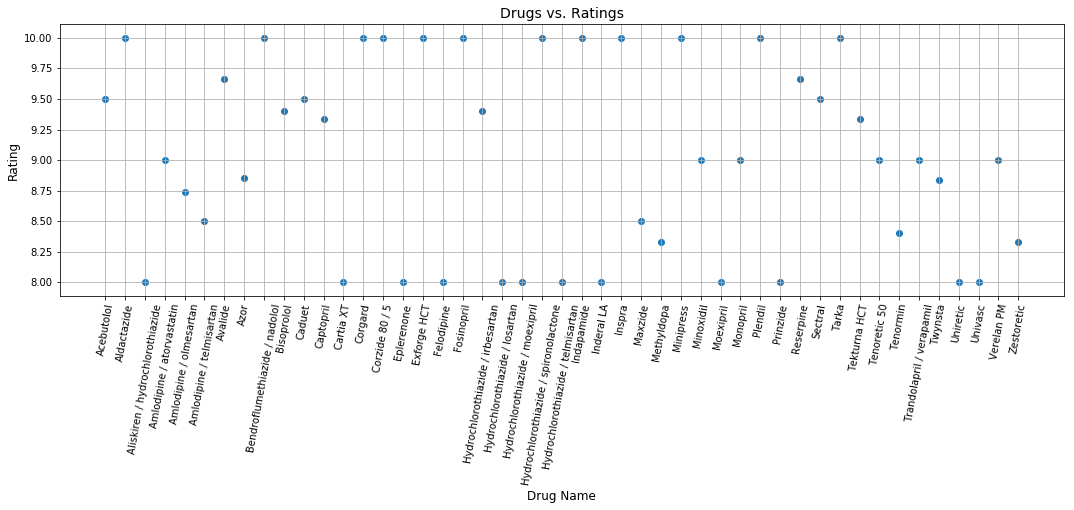

In [22]:
# Visualuisig the selected highly rated drugs for High Blood Pressure

%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
fig.set_size_inches(18, 5)

axis.set_title('Drugs vs. Ratings', fontsize=14)
axis.set_xlabel('Drug Name', fontsize=12)
axis.set_ylabel('Rating', fontsize=12)

Xaxis = selected_drugs_hbp['drugName']
Yaxis = selected_drugs_hbp['rating']

axis.scatter(Xaxis, Yaxis)
plt.xticks(rotation=80)
plt.grid(True)
plt.show()

The above queries and plot shows the patient's **highly rated drugs** for **High Blood Pressure**.

### Finding Ratings Pattern (if any)

In [23]:
# First checking the general ststistics in pandas

drug_train.describe()

,Unnamed: 0,rating,usefulCount
count,160398.000000,160398.000000,160398.000000
mean,115957.147309,6.995923,28.097613
std,67015.899492,3.272303,36.457876
min,2.000000,1.000000,0.000000
25%,58065.250000,5.000000,6.000000
50%,115845.500000,8.000000,16.000000
75%,173826.750000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [24]:
# Grouping ratings per rating sizes

ratings = drug_train.groupby('rating').size()
ratings

rating
1.0     21504
2.0      6879
3.0      6465
4.0      4980
5.0      7959
6.0      6301
7.0      9395
8.0     18791
9.0     27379
10.0    50745
dtype: int64

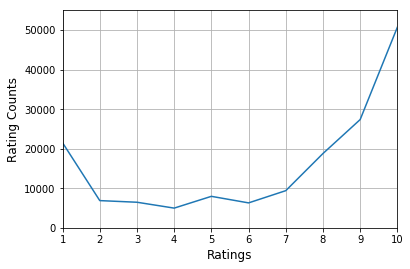

In [25]:
# Visualising the relative counts of each rating received

pd_ratings = pd.DataFrame(ratings, columns=['counts'])

plt.plot(pd_ratings.index, pd_ratings['counts'].values)
plt.xlabel('Ratings', fontsize=12)
plt.ylabel('Rating Counts', fontsize=12)
plt.axis([1, 10, 0, 55000])
plt.grid(True)
plt.show()

Seems most of the ratings are received towards the higher values. As per the `describe()` function (above), 50% reviews have 8 or more than 8 ratings.

### Finding Relation (if any) between Review Length and Corresponding Rating
Generally people write reviews when they want to express their experiences about the product. Let's see if the length of each review that users write, has any relation to the corresponding rating that they provide.

For that, first we need to find the length of each reviews and add a column in the datasets to store this information.

In [26]:
# Length of each review in both the trainng and testing datasets

for dataset in full_data:
    dataset['review_len'] = dataset['review'].apply(len)

drug_train.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,review_len
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,79
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,741
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,755
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,448
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,719


In [27]:
drug_test.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,review_len
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22,439
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17,268
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3,29
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35,782
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4,762


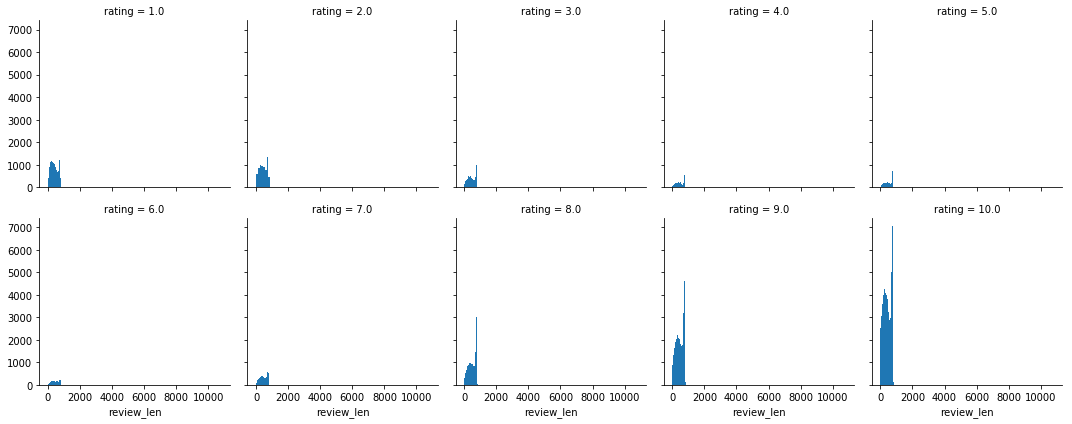

In [28]:
# Comparing review length to rating with histogram plot

import seaborn as sns

graph = sns.FacetGrid(data=drug_train, col='rating', col_wrap=5)
graph.map(plt.hist, 'review_len', bins=100)

From the above histogram plots, it appears that the overall distribution of **review length** is similar across all ten ratings. However, the **number of reviews** are increasing towards the extreme ends; more for the higher ratings.

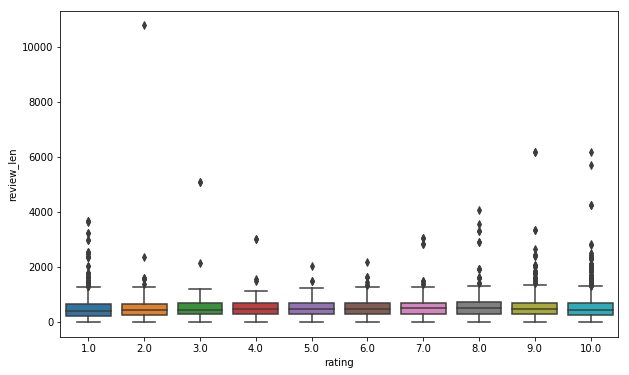

In [29]:
# Comparing review length to rating with box plot

plt.figure(figsize=(10,6))
sns.boxplot(x='rating', y='review_len', data=drug_train)

From the above box plot it appears that although longer reviews are present for all ratings; however, the extreme ratings like 1.0 and 10.0 have more numbers of longer reviews, The lower middle to upper middle ratings have lesser number of longer reviews.

So it appears that people write more lengthy reviews when they have either **very good experience** or **very bad experience** with the product. For broader middle ratings, users generally do not write much in the reviews.

Because of this skewed pattern at the extreme ends, review length **might not** be an useful feature to consider for machine learning to predict review ratings, because that can mean any rating towards the extreme ends either 1.0 or 10.0.

### Corelation beteween Data Columns
Correlation statistics uses the numeric data columns only from the dataframe. So let's create a dataframe with numeric columns **rating**, **usefulCount**, and **review_len** from both train and test data before finding correlation.

In [30]:
train_data = drug_train[['rating', 'usefulCount', 'review_len']]
test_data = drug_test[['rating', 'usefulCount', 'review_len']]
corr_data = train_data.append(test_data)
corr_data.shape

(213869, 3)

Finding correlation between the columns in the new dataframe:

In [31]:
corr_data.corr()

,rating,usefulCount,review_len
rating,1.000000,0.235121,0.022088
usefulCount,0.235121,1.000000,0.025613
review_len,0.022088,0.025613,1.000000


Let's visualise these correlations using the Seaborn heatmap.

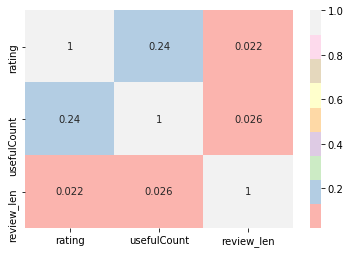

In [32]:
sns.heatmap(data=corr_data.corr(), cmap="Pastel1", annot=True)

Looking at the heatmap, there is only some small correlation exist between **usefulCount** and **rating**, but **review_len** is again very weekly correlated with **rating**. So these features (usefulCount and review_len), can't be used for training in machine learning.

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>Machine Learning</p>

### Preparing for Machine Learning
Now, let's next focus on review texts and ratings in the **training dataset**. We can use these to train the machine learning models and then use the trained models to predict review sentiments in the **testing dataset** based on the review texts in it. 

So for that, first we need to define the reviews in the datasets based on the ratings. Let's define the reviews as following:
* 1 - Bad:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; If rating is <= 3.0
* 2 - Neutral:&nbsp;&nbsp;&nbsp; If rating is >= 4.0 and <=7.0
* 3 - Good:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; If rating is >= 8.0

And then, we can group the reviews in the datasets as per these broad **classes (1, 2, and 3)** and the corresponding  **categories (bad, neutral, and good)** and save the results in new columns. In the training dataset, we will be using these columns as **target** for the machine learning models. In the testing dataset, we will be using these columns to compare the model's predictions. And we will be using the texts from the **review** column as features.

<b>NB.:</b> In this project I am trying both classification and regression models, hence using categories and classes respectively as targets. We know that ideally we should use the text categories (good, neutral, or bad) for Classification and the numeric classes (1, 2, or 3) for Regression.

In [33]:
# Creating a column rev_class to save the rating classes as 1, 2, or 3

for dataset in full_data:
    dataset['rev_class'] = 0
    # Mapping rating to rating classes
    dataset.loc[ dataset['rating'] <= 3.0, 'rev_class'] = 1
    dataset.loc[(dataset['rating'] >= 4.0) & (dataset['rating'] <= 7.0), 'rev_class'] = 2
    dataset.loc[ dataset['rating'] >= 8.0, 'rev_class'] = 3
    dataset['rev_class'] = dataset['rev_class'].astype(int)

In [34]:
# Creating a column rev_categ to save the rating categories as bad, neutral, or good

for dataset in full_data:
    dataset['rev_categ'] = 0
    # Mapping rating to rating categories
    dataset.loc[ dataset['rating'] <= 3.0, 'rev_categ'] = 'bad'
    dataset.loc[(dataset['rating'] >= 4.0) & (dataset['rating'] <= 7.0), 'rev_categ'] = 'neutral'
    dataset.loc[ dataset['rating'] >= 8.0, 'rev_categ'] = 'good'
    dataset['rev_categ'] = dataset['rev_categ'].astype(str)

In [35]:
# Viewing the newly added columns with respect to the rating column
drug_train.head(6)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,review_len,rev_class,rev_categ
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,79,3,good
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,741,3,good
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,755,2,neutral
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,448,3,good
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,719,3,good
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2.0,"November 28, 2015",43,403,1,bad


Since the datasets are already split into train and test datasets, we do not need to split them again. We just need to create some datasets with the splits to hold data as following for use in Classification and Regression.

In [36]:
# Creating datasets for training and testing

X_train = drug_train['review']
y_train_cls = drug_train['rev_categ']    # For use in Classificaton training
y_train_reg = drug_train['rev_class']    # For use in Regression training

X_test = drug_test['review']
y_test_cls = drug_test['rev_categ']    # For use in Classificaton prediction
y_test_reg = drug_test['rev_class']    # For use in Regression prediction

### Text pre-processing and Vectorisation

Now let's focus on the review texts. We can't directly use the review texts; the algorithm will need some sort of feature vector in order to perform the classification task. So we will convert the review texts into vector formats as per the **bag of words** approach, where each unique word in a texts will be represented by one vector (number).

But first we need to tokenise the text and clean the words to remove punctuations and stopwords.

In [37]:
X_train.head()

0    "It has no side effect, I take it in combinati...
1    "My son is halfway through his fourth week of ...
2    "I used to take another oral contraceptive, wh...
3    "This is my first time using any form of birth...
4    "Suboxone has completely turned my life around...
Name: review, dtype: object

In [38]:
# Reading a sample text from training dataset
X_train[4]

'"Suboxone has completely turned my life around.  I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account.  I had none of those before Suboxone and spent years abusing oxycontin.  My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction.  All that is history.  If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again.  I have found the side-effects to be minimal compared to oxycontin.  I&#039;m actually sleeping better.   Slight constipation is about it for me.  It truly is amazing. The cost pales in comparison to what I spent on oxycontin."'

In [39]:
# Text pre-processing - tokenising and removal of stopwords and punctuation

import string
from nltk import word_tokenize
from nltk.corpus import stopwords

def text_process(text):
    tokenized_sent = [word.lower() for word in word_tokenize(text)]
    rare_words = ['``', "''", '...', '..', '039', '1.5', 'ive']
    useless_words = stopwords.words("english") + list(string.punctuation) + rare_words
    return [word for word in tokenized_sent if not word in useless_words]

In [40]:
# Checking a randomly selected review

sample_text = X_train[4]
print(text_process(sample_text))

['suboxone', 'completely', 'turned', 'life', 'around', 'feel', 'healthier', 'excelling', 'job', 'always', 'money', 'pocket', 'savings', 'account', 'none', 'suboxone', 'spent', 'years', 'abusing', 'oxycontin', 'paycheck', 'already', 'spent', 'time', 'got', 'started', 'resorting', 'scheming', 'stealing', 'fund', 'addiction', 'history', 'ready', 'stop', 'good', 'chance', 'suboxone', 'put', 'path', 'great', 'life', 'found', 'side-effects', 'minimal', 'compared', 'oxycontin', 'actually', 'sleeping', 'better', 'slight', 'constipation', 'truly', 'amazing', 'cost', 'pales', 'comparison', 'spent', 'oxycontin']


Next, we convert the above listed clean and useful words into vectors, in the process called **vectorisation**.

In [41]:
# Converting the words into vector
# This task takes some time, hence using a timer. Takes about 3.4 minutes.

from sklearn.feature_extraction.text import CountVectorizer
import time

start_time = time.time()

vocab = CountVectorizer(analyzer=text_process).fit(X_train)
len(vocab.vocabulary_)

print(round(time.time() - start_time), 'sec')

198 sec


To illustrate how the vectoriser works, let’s try a random review; say the text in X[10], and get its bag of word counts as vectors:

In [42]:
train_text = X_train[4]
vocab_train = vocab.transform([train_text])
print(vocab_train)

  (0, 12523)	1
  (0, 12624)	1
  (0, 12953)	1
  (0, 13067)	1
  (0, 14209)	1
  (0, 14302)	1
  (0, 14356)	1
  (0, 16045)	1
  (0, 18204)	1
  (0, 21450)	1
  (0, 23321)	1
  (0, 23324)	1
  (0, 23401)	1
  (0, 23875)	1
  (0, 24375)	1
  (0, 31851)	1
  (0, 32952)	1
  (0, 34495)	1
  (0, 34923)	1
  (0, 36028)	1
  (0, 36114)	1
  (0, 36327)	1
  (0, 37501)	1
  (0, 38228)	1
  (0, 42125)	1
  :	:
  (0, 47612)	1
  (0, 48227)	1
  (0, 50736)	1
  (0, 53255)	3
  (0, 53655)	1
  (0, 54149)	1
  (0, 54223)	1
  (0, 55893)	1
  (0, 58264)	1
  (0, 59097)	1
  (0, 60402)	1
  (0, 62031)	1
  (0, 62225)	1
  (0, 63729)	1
  (0, 64363)	1
  (0, 64445)	1
  (0, 65436)	3
  (0, 66068)	1
  (0, 66177)	1
  (0, 66491)	1
  (0, 66995)	3
  (0, 69878)	1
  (0, 71406)	1
  (0, 71585)	1
  (0, 76606)	1


Now that the words in the review index ID 4 have been converted into vectors, we see that most of the words appear once; three words appear thrice. Let’s check which ones appear thrice. In other words, let's bring back those three transformed words into the original word form.

In [43]:
# Getting the words back

print(vocab.get_feature_names()[53255])
print(vocab.get_feature_names()[65436])
print(vocab.get_feature_names()[66995])

oxycontin
spent
suboxone


After confirming the vectorisation process works, we need to transform the training and testing text dataframes into sparse matrix using the **transform() method** on our bag-of-words transformed object created above.

In [44]:
start_time = time.time()    # Takes about 4.6 minutes

vocab_X_train = vocab.transform(X_train)
vocab_X_test = vocab.transform(X_test)

print(round(time.time() - start_time), 'sec')

278 sec


In [45]:
print('Shape of Sparse Matrix (For train texts): ', vocab_X_train.shape)
print('Amount of Non-Zero occurrences: ', vocab_X_train.nnz)
# Percentage of non-zero values
density1 = (vocab_X_train.nnz/(vocab_X_train.shape[0] * vocab_X_train.shape[1]))*100
print('\nDensity of the matrix: {:.4f}'.format((density1)))

Shape of Sparse Matrix (For train texts):  (160398, 77304)
Amount of Non-Zero occurrences:  5981501

Density of the matrix: 0.0482


In [46]:
print('Shape of Sparse Matrix (For test texts): ', vocab_X_test.shape)
print('Amount of Non-Zero occurrences: ', vocab_X_test.nnz)
# Percentage of non-zero values
density2 = (vocab_X_test.nnz/(vocab_X_test.shape[0] * vocab_X_test.shape[1]))*100
print('\nDensity of the matrix: {:.4f}'.format((density2)))

Shape of Sparse Matrix (For test texts):  (53471, 77304)
Amount of Non-Zero occurrences:  1982826

Density of the matrix: 0.0480


### Training and testing a Classification model

And then, we use the transformed training and testing texts in the sparse matrix as features for developing machine learning models. First let's try with the **DecisionTreeClassifier** as following:

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, \
                            explained_variance_score, mean_squared_error

In [48]:
# Decision Tree Classifier

start_time = time.time()    #Takes about 6.5 minutes

dtree = DecisionTreeClassifier()
dtree.fit(vocab_X_train, y_train_cls)

pred_dtree = dtree.predict(vocab_X_test)

for i in range(15):
    print('Review ID = {:<6} Actual = {:<10s} Predicted = {:<10s}'.format(i, y_test_cls[i], pred_dtree[i]))

print("\nConfusion Matrix for Decision Tree Classifier:")
print(confusion_matrix(y_test_cls, pred_dtree))
print("\nAccuracy Score:", round(accuracy_score(y_test_cls, pred_dtree)*100,2))
print("\nClassification Report:")
print(classification_report(y_test_cls, pred_dtree))

print('-'*53)
print(round(time.time() - start_time), 'sec')

Review ID = 0      Actual = good       Predicted = good      
Review ID = 1      Actual = good       Predicted = good      
Review ID = 2      Actual = good       Predicted = good      
Review ID = 3      Actual = good       Predicted = good      
Review ID = 4      Actual = good       Predicted = good      
Review ID = 5      Actual = neutral    Predicted = neutral   
Review ID = 6      Actual = neutral    Predicted = neutral   
Review ID = 7      Actual = good       Predicted = good      
Review ID = 8      Actual = neutral    Predicted = good      
Review ID = 9      Actual = bad        Predicted = bad       
Review ID = 10     Actual = bad        Predicted = bad       
Review ID = 11     Actual = neutral    Predicted = bad       
Review ID = 12     Actual = bad        Predicted = bad       
Review ID = 13     Actual = good       Predicted = good      
Review ID = 14     Actual = bad        Predicted = bad       

Confusion Matrix for Decision Tree Classifier:
[[ 9111  1855   820]
 

The accuracy score of the prediction with the Decision Tree Classification model is achieved as **82.95%**, which is quite good. The prediction results and accuracy score of the model shows that the Decision Tree Classifier can be applied for these kind of sentiment analysis on drugs reviews.

### Training and testing a Regression model
Next, we use the transformed training and testing texts in the sparse matrix as features for a Regression model. The Simple Linear Regression model is tried using the vectorised texts as features.

In [49]:
# Simple Linear Regression

start_time = time.time()    # Takes about 5.2 minutes

lnreg = LinearRegression() 
lnreg.fit(vocab_X_train, y_train_reg)

pred_lnreg = lnreg.predict(vocab_X_test)

for i in range(15):
    print('Review ID = {:<6} Actual = {:<6} Predicted = {:<10}'.format(i, y_test_reg[i], round(pred_lnreg[i])))

# Regression coefficients 
print('\nCoefficients:\n', lnreg.coef_)

# Calculating Variance, MSE, and RMSE
lnreg_evs = explained_variance_score(y_test_reg, pred_lnreg)
print('\nExplained Variance score: {:.4f}'.format(lnreg_evs))

lnreg_mse = mean_squared_error(y_test_reg, pred_lnreg)
lnreg_rmse = np.sqrt(lnreg_mse)
print('Mean Squared Error (MSE): {:.4f}'.format(lnreg_mse))
print('Root Mean Squared Error (RMSE): {:.4f}'.format(lnreg_rmse))

print('-'*65)
print(round(time.time() - start_time), 'sec')

Review ID = 0      Actual = 3      Predicted = 3.0       
Review ID = 1      Actual = 3      Predicted = 3.0       
Review ID = 2      Actual = 3      Predicted = 2.0       
Review ID = 3      Actual = 3      Predicted = 3.0       
Review ID = 4      Actual = 3      Predicted = 4.0       
Review ID = 5      Actual = 2      Predicted = 2.0       
Review ID = 6      Actual = 2      Predicted = 2.0       
Review ID = 7      Actual = 3      Predicted = 2.0       
Review ID = 8      Actual = 2      Predicted = 2.0       
Review ID = 9      Actual = 1      Predicted = 2.0       
Review ID = 10     Actual = 1      Predicted = 1.0       
Review ID = 11     Actual = 2      Predicted = 3.0       
Review ID = 12     Actual = 1      Predicted = 2.0       
Review ID = 13     Actual = 3      Predicted = 2.0       
Review ID = 14     Actual = 1      Predicted = 2.0       

Coefficients:
 [-0.32000427 -1.28682065  0.46070487 ...  0.46122858 -0.08393847
  1.13825541]

Explained Variance score: 0.2114
M

The regression results and Root Mean Square Error shows that the Simple Linear Regression model can be applied for these kind of sentiment analysis. However the **Root Mean Square Error of 0.7307** indicates that accuracy can be improved by applying some text cleanings. The RMS Error is a measure of the differences between values predicted by the model and the actual values observed. A RMSE value of 0, which is almost never achieved in practice, would indicate a perfect fit to the data.

Similarly, we can try some other classification and regression models as well and compare the accuracy scores etc. and select the ones with the highter scores. However, trying with some other other classification and regression models is beyond the scope and interest of the present work.

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>Production Testing of the Models</p>

### Applying the models on real review comments
Now, finally let's use the models trained above for predicting some sentiments on patient's reviews.

In [50]:
real_reviews = pd.read_table('./drugsCom_raw/drugsComReviews_real.tsv')
drug_reviews = real_reviews[['review', 'rating']]
drug_reviews.head(50)

,review,rating
0,"""So I was on Ginanvi for about 3 months before...",3.0
1,"""When I first started taking Victoza I got pre...",9.0
2,"""I had been using Ziidra for approximately two...",1.0
3,"""I have been prescribed all types of sleeping ...",10.0
4,"""My doctor prescribed tizandine for Migraine h...",6.0
5,"""I&#039;m 31 and this was my first time gettin...",1.0
6,"""I&#039;ve been on Geodon for a little over a ...",9.0
7,"""While the Avonex was extremely effective on t...",2.0
8,"""For the second time in few months I&#039;m ge...",2.0
9,"""Honestly, I&#039;ve never made a better decis...",10.0


In [51]:
drug_reviews.shape

(50, 2)

Let's pick any review from the list of 50 reviews from real patients and apply the above trained models for predicting the underlying sentiment of that patient. Accordingly as a drug company representative, may be I can help that patient... :)

#### Random First Review

In [52]:
# The Decision Tree Classifier model's prediction:

review1 = [drug_reviews['review'][7]]
vocab_rev1 = vocab.transform(review1)
pred_dtree_rev1 = dtree.predict(vocab_rev1)
print(review1)
print('-'*60)
print('The sentiment on the drug use is:', ''.join(map(str, pred_dtree_rev1)))

['"While the Avonex was extremely effective on the lesions (they became smaller and some actually disappeared!).  However, the side effects were severe. It literally took me out for 3 days (totally) it took about 2 more days to do anything above the bare minimum i.e. go to work, come home, eat and sleep, and I had about a day and a half to get everything else done such as grocery shopping and mowing the yard and taking out the garbage.  Let alone housekeeping.  I finally just switched to Copaxone due to anxiety over injecting the drug with such a large needle and to counteract the side effects of Avonex."']
------------------------------------------------------------
The sentiment on the drug use is: bad


In [53]:
# The Simple Linear Regression model's prediction:

pred_lnreg_rev1 = np.round(lnreg.predict(vocab_rev1))
print('The review class on the drug use is:', ''.join(map(str, pred_lnreg_rev1)))
print('\nwhere 1.0 = bad | 2.0 = neutral | 3.0 = good')

The review class on the drug use is: 1.0

where 1.0 = bad | 2.0 = neutral | 3.0 = good


#### Random Second Review

In [54]:
# The Decision Tree Classifier model's prediction:

review2 = [drug_reviews['review'][11]]
vocab_rev2 = vocab.transform(review2)
pred_dtree_rev2 = dtree.predict(vocab_rev2)
print(review2)
print('-'*60)
print('The sentiment on the drug use is:', ''.join(map(str, pred_dtree_rev2)))

['"I was a bit nervous about starting contrave due to all the listed side affects which sound scary. My healthcare professional said the suicidal thoughts would probably occur in someone under 18 y/o. She didn&#039;t have any comment on the part about seizures. Sister and I tried it on the same day. Sister took hers and panicked, thought she was dying so she didn&#039;t take any more. I have a high tolerance for everything so the dizziness and sudden nausousness didn&#039;t alarm me as much. Make sure you don&#039;t have anywhere to go when you 1st try it. First week was a little rough, I got immune to it. It does suppress my appetite but not much. I&#039;ve lost inches b/c I have energy to go to the gym now but my weight is about  the same as it was 2 months ago."']
------------------------------------------------------------
The sentiment on the drug use is: neutral


In [55]:
# The Simple Linear Regression model's prediction:

pred_lnreg_rev2 = np.round(lnreg.predict(vocab_rev2))
print('The review class on the drug use is:', ''.join(map(str, pred_lnreg_rev2)))
print('\nwhere 1.0 = bad | 2.0 = neutral | 3.0 = good')

The review class on the drug use is: 3.0

where 1.0 = bad | 2.0 = neutral | 3.0 = good


#### Random Third Review

In [56]:
# The Decision Tree Classifier model's prediction:

review3 = [drug_reviews['review'][27]]
vocab_rev3 = vocab.transform(review3)
pred_dtree_rev3 = dtree.predict(vocab_rev3)
print(review3)
print('-'*60)
print('The sentiment on the drug use is:', ''.join(map(str, pred_dtree_rev3)))

['"I had to use some Watson  lidocaine  patch&#039;s one time because my other brand was not in stock at this particular store. Although they did work they fall off in 5 minutes. I wonder if it is the difference in skin texture or something defective with my patches in this box. One user said they stick.   Did I get a bad box?"']
------------------------------------------------------------
The sentiment on the drug use is: good


In [57]:
# The Simple Linear Regression model's prediction:

pred_lnreg_rev3 = np.round(lnreg.predict(vocab_rev3))
print('The review class on the drug use is:', ''.join(map(str, pred_lnreg_rev3)))
print('\nwhere 1.0 = bad | 2.0 = neutral | 3.0 = good')

The review class on the drug use is: 2.0

where 1.0 = bad | 2.0 = neutral | 3.0 = good


#### Random Fourth Review

In [58]:
# The Decision Tree Classifier model's prediction:

review4 = [drug_reviews['review'][35]]
vocab_rev4 = vocab.transform(review4)
pred_dtree_rev4 = dtree.predict(vocab_rev4)
print(review4)
print('-'*60)
print('The sentiment on the drug use is:', ''.join(map(str, pred_dtree_rev4)))

['"Three days after receiving my first Prolia injection I developed a cough, which turned into bronchitis &amp; was treated with antibiotics - bad luck, a coincident I thought. A month later my life change with severe bone pain in my right jaw, I had lock jaw 5 times. Pain in my right shoulder, ribs, my neck was so stiff, but worse was my lack of immobility, my morning walk to the bathroom was just like watching Frankenstein walk, I couldn&#039;t move any faster because of the pain. Getting on the toilet one off the toilet was a major event. Turning in bed was excruciating and sometimes impossible, this lasted the whole of the summer 2015, which eventually tampered off to where I am today. Worst experience of my life. No more Prolia for me."']
------------------------------------------------------------
The sentiment on the drug use is: bad


In [59]:
# The Simple Linear Regression model's prediction:

pred_lnreg_rev4 = np.round(lnreg.predict(vocab_rev4))
print('The review class on the drug use is:', ''.join(map(str, pred_lnreg_rev4)))
print('\nwhere 1.0 = bad | 2.0 = neutral | 3.0 = good')

The review class on the drug use is: 1.0

where 1.0 = bad | 2.0 = neutral | 3.0 = good


#### Random Fifth Review

In [60]:
# The Decision Tree Classifier model's prediction:

review5 = [drug_reviews['review'][44]]
vocab_rev5 = vocab.transform(review5)
pred_dtree_rev5 = dtree.predict(vocab_rev5)
print(review5)
print('-'*60)
print('The sentiment on the drug use is:', ''.join(map(str, pred_dtree_rev5)))

['"I started taking Apri about 7 months ago. My breats got noticeably larger within the first few weeks and I gained about 10 pounds, but I&#039;m a thin girl anyway so I gladly take on the extra few pounds and curves. I got prescribed this birth control because of my ovarian cysts and since I have not had any problems with them. They&#039;ve been unnoticeable and my cramps don&#039;t even exist anymore. I love Apri and it&#039;s affordable. Just what I need in this economic clash."']
------------------------------------------------------------
The sentiment on the drug use is: good


In [61]:
# The Simple Linear Regression model's prediction:

pred_lnreg_rev5 = np.round(lnreg.predict(vocab_rev5))
print('The review class on the drug use is:', ''.join(map(str, pred_lnreg_rev5)))
print('\nwhere 1.0 = bad | 2.0 = neutral | 3.0 = good')

The review class on the drug use is: 3.0

where 1.0 = bad | 2.0 = neutral | 3.0 = good


**Cross verification:**<br />
Please cross check the results provided by the models with the original review ratings listed in section 50 above.

### Findings & Conclusion:
The following conclusions can be drawn from this drug review analysis:
1. Patient's drugs ratings, review-rating patterns, and sentiment analysis with machine learning were studied in the work.
2. It was observed that the extreme ratings like 1.0 and 10.0 have more numbers of longer reviews. The lower middle to upper middle ratings has lesser number of longer reviews. So, it appears that people write more lengthy reviews when they have either very good experience or very bad experience with the product. For broader middle ratings, users generally do not write much in the reviews.
3. Review length is very weekly correlated with ratings and skewness of review length counts is observed at the extreme ends of the rating scale. That means, longer reviews do not guarantee a higher rating.
4. In this drug review analysis, it was observed that maximum ratings are received towards the higher rating values. For example, 50% reviews have 8 or more than 8 ratings, indicating that patients are satisfied with the drugs they were administered.
5. Two machine learning models were developed and trained, namely, Decision Tree Classification and Simple Linear Regression and it was observed that these models can be applied for sentiment predictions of reviewers. However, the accuracy score can be improved by applying more text cleanings.
6. Finally, the above two trained models were applied on some real drug reviews to predict the patient's sentiments. Also, a comparison between the results of the two models were observed side-by-side.

#### References: ####
https://www.nltk.org/book/ch06.html<br />
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics<br />
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html<br />
https://stackoverflow.com/questions/22920801/can-i-use-countvectorizer-in-scikit-learn-to-count-frequency-of-documents-that-w<br />
https://towardsdatascience.com/3-basic-approaches-in-bag-of-words-which-are-better-than-word-embeddings-c2cbc7398016<br />
https://medium.com/tensorist/classifying-yelp-reviews-using-nltk-and-scikit-learn-c58e71e962d9<br />